In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2025-03-14 213251.png to Screenshot 2025-03-14 213251.png


In [ ]:
# Get filename from uploaded files
filename = list(uploaded.keys())[0]

# Load the image
image = mpimg.imread(filename)

if len(image.shape) == 3:
  image = np.mean(image, axis = 2)

# Normalize image to range 0-255 (if it's not already)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer format (important)
image = np.uint8(image)

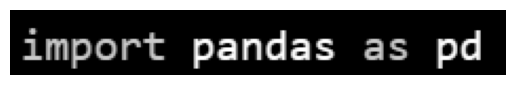

In [ ]:
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

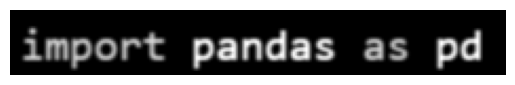

In [ ]:
blurred = cv2.GaussianBlur(image, (3, 3), 0)
plt.imshow(blurred, cmap="gray")
plt.axis("off")
plt.show()

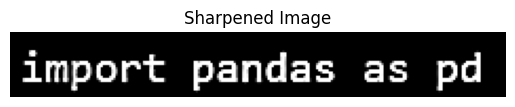

In [ ]:
# Define sharpening kernel
sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

# Apply the kernel to the image
sharpened_image = cv2.filter2D(blurred, -1, sharpening_kernel)

# Show result
plt.imshow(sharpened_image, cmap="gray")
plt.axis("off")
plt.title("Sharpened Image")
plt.show()

In [ ]:
print(sharpened_image.shape)

(31, 235)


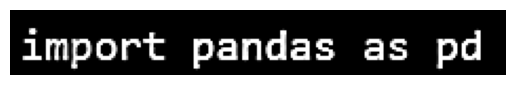

In [ ]:
plt.imshow(sharpened_image, cmap="gray")
plt.axis("off")
plt.show()

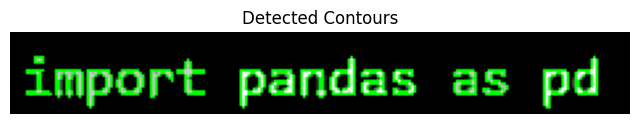

In [ ]:
# Find contours
contours, _ = cv2.findContours(sharpened_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Create a copy of the image to draw contours
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
# Draw contours on the image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)  # Green color contours

# Display the image with contours
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Contours")
plt.show()

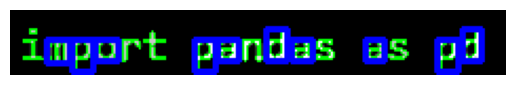

In [ ]:
for contour in contours:
    if cv2.contourArea(contour) > 50:  # Ignore small contours
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box
# Show result
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

(50, 51)


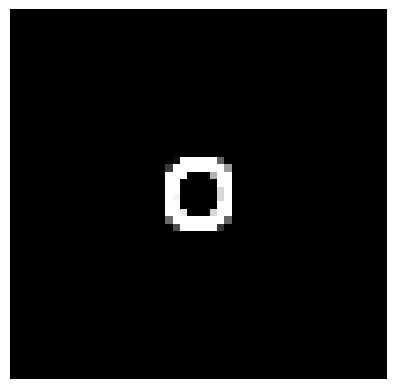

In [ ]:
padding = 1  # Adjust padding as needed
segment = {}
j = 0
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    # Add padding and ensure we don't go out of image bounds
    x_start = max(x - padding, 0)
    y_start = max(y - padding, 0)
    x_end = min(x + w + padding, image.shape[1])
    y_end = min(y + h + padding, image.shape[0])
    letter = sharpened_image[y_start:y_end, x_start:x_end]
    border_color = (int(letter[0,0])+int(letter[0, letter.shape[1]-1])+int(letter[letter.shape[0]-1,0])+int(letter[letter.shape[0]-1, letter.shape[1]-1]))/4
    if border_color == 0 or border_color == 255:
      shape_diff = (letter.shape[0] - letter.shape[1])
      if shape_diff %2 == 0:
        shape_diff = shape_diff//2
      else:
        shape_diff = shape_diff//2 + 1
      padded_letter = cv2.copyMakeBorder(letter, max(20-shape_diff, 20) , max(20-shape_diff,20), max(20+shape_diff, 20), max(20+shape_diff,20), cv2.BORDER_CONSTANT, value = border_color)
      segment[f"character_{j}"] = padded_letter
      j += 1
plt.imshow(segment["character_10"], cmap="gray")
print(segment["character_10"].shape)
plt.axis("off")
plt.show()

0 (32, 32)


<ipython-input-156-7911ec1eebfd>:13: RuntimeWarning: overflow encountered in scalar add
  border_color = int((letter[0, 0] + letter[0, -1] + letter[-1, 0] + letter[-1, -1]) / 4)


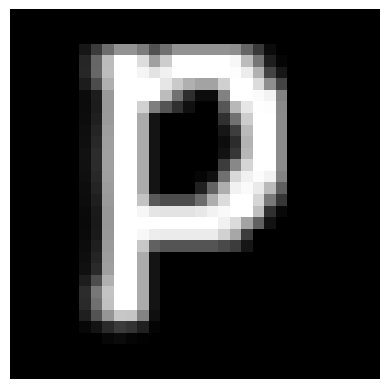

1 (32, 32)


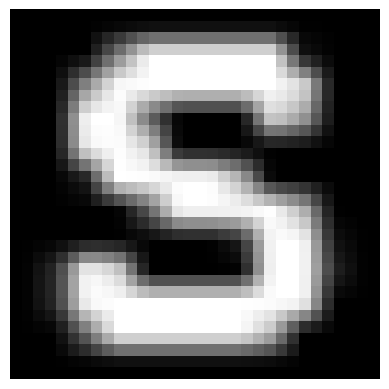

2 (32, 32)


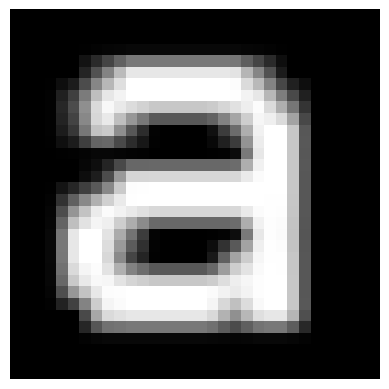

3 (32, 32)


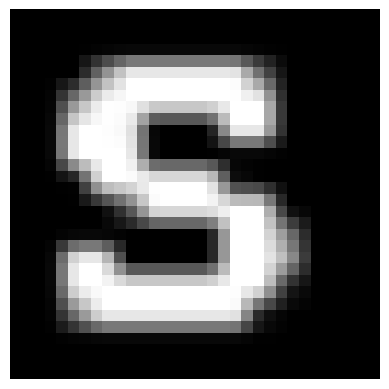

4 (32, 32)


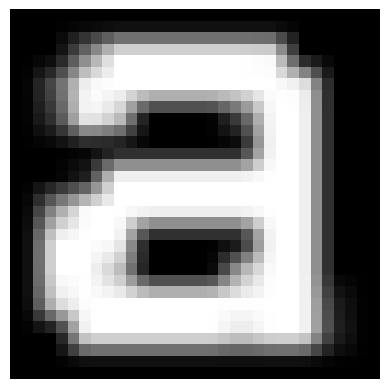

5 (32, 32)


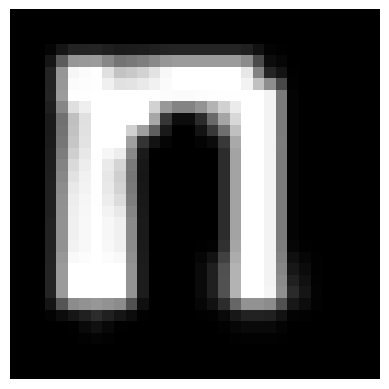

6 (32, 32)


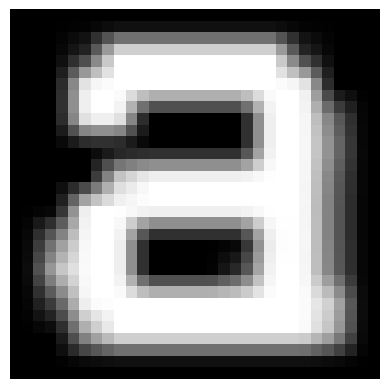

7 (32, 32)


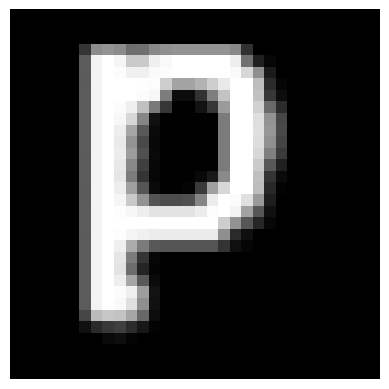

8 (32, 32)


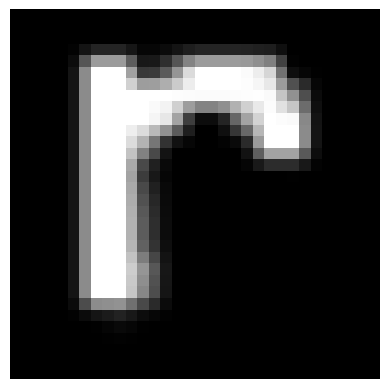

9 (32, 32)


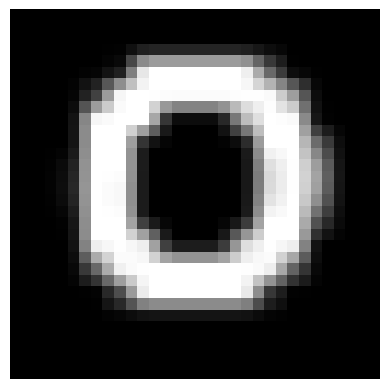

10 (32, 32)


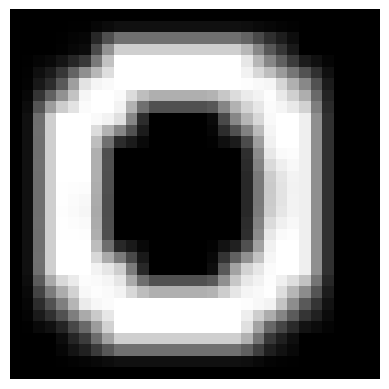

11 (32, 32)


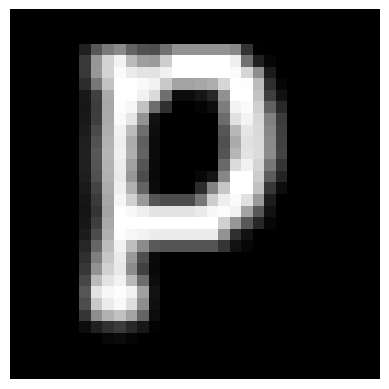

12 (32, 32)


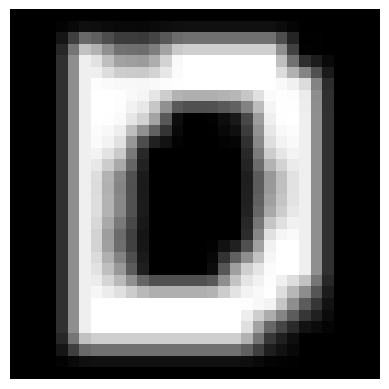

13 (32, 32)


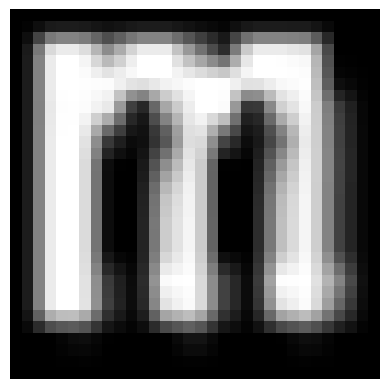

14 (32, 32)


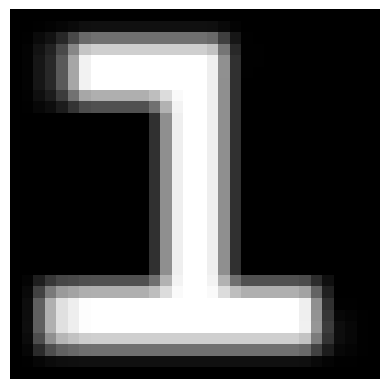

15 (32, 32)


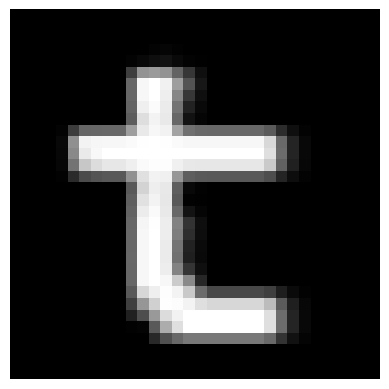

16 (32, 32)


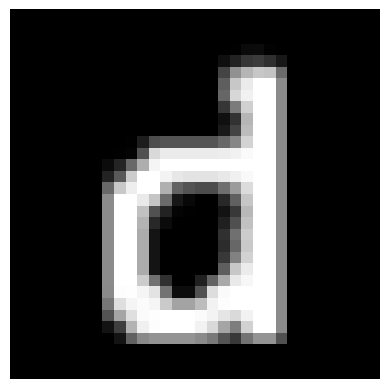

17 (32, 32)


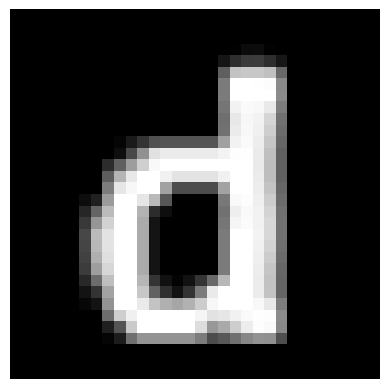

In [ ]:
padding1 = 0
pad = 1  # Adjust padding as needed
segment = {}
j = 0
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    # Add padding and ensure we don't go out of image bounds
    x_start = max(x - padding, 0)
    y_start = max(y - padding, 0)
    x_end = min(x + w + padding, image.shape[1])
    y_end = min(y + h + padding, image.shape[0])
    letter = sharpened_image[y_start:y_end, x_start:x_end]
    border_color = int((letter[0, 0] + letter[0, -1] + letter[-1, 0] + letter[-1, -1]) / 4)
    if border_color == 0 or border_color == 255:
      height, width = letter.shape
      if height > width:
        # Pad width to match height
        pad_left = (height - width) // 2
        pad_right = (height - width) - pad_left
        padded_letter = cv2.copyMakeBorder(letter, pad, pad, pad + pad_left, pad + pad_right, cv2.BORDER_CONSTANT, value=border_color)
      elif width > height:
        # Pad height to match width
        pad_top = (width - height) // 2
        pad_bottom = (width - height) - pad_top
        padded_letter = cv2.copyMakeBorder(letter, pad + pad_top, pad + pad_bottom, pad, pad, cv2.BORDER_CONSTANT, value=border_color)
      else:
        # Already square, no padding needed
        padded_letter = letter
      padded_letter = cv2.resize(padded_letter, (32, 32), 1, 1, cv2.INTER_LINEAR)
      segment[f"character_{j}"] = padded_letter
      j += 1
for idx in range (j-1):
  plt.imshow(segment[f"character_{idx}"], cmap="gray")
  print(idx, segment[f"character_{idx}"].shape)
  plt.axis("off")
  plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thomasqazwsxedc/alphabet-characters-fonts-dataset")

print("Path to dataset files:", path)


KeyboardInterrupt: 

Contents of nested Images folder: ['K', 'L', 'U', 'O', 'Z', 'F', 'W', 'X', 'H', 'S', 'C', 'B', 'D', 'A', 'M', 'G', 'N', 'Y', 'T', 'P', 'J', 'Q', 'I', 'V', 'E', 'R']


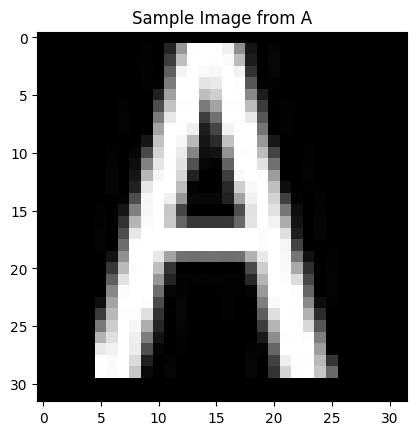

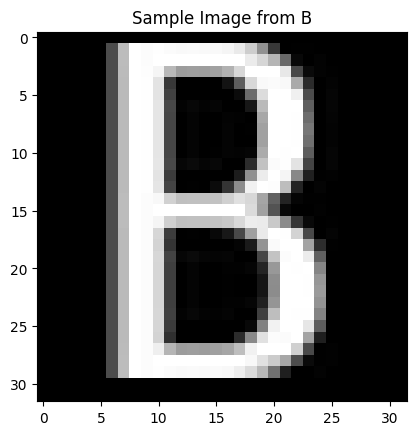

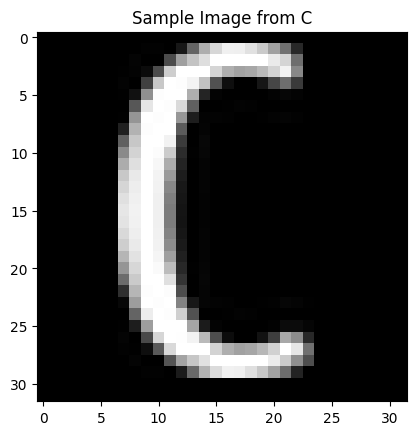

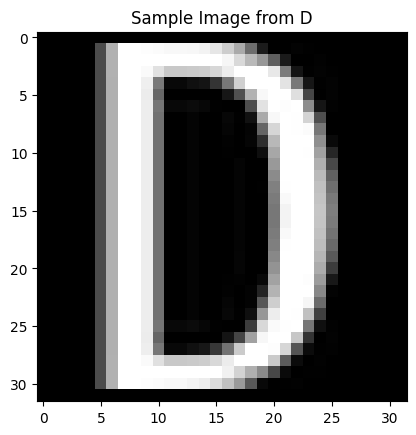

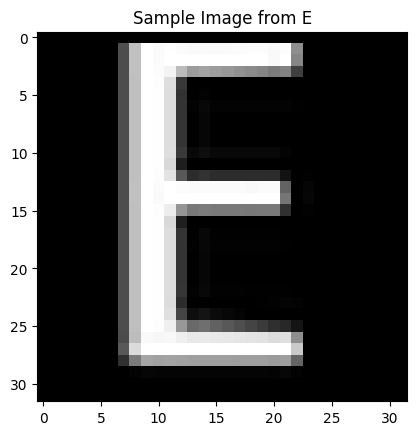

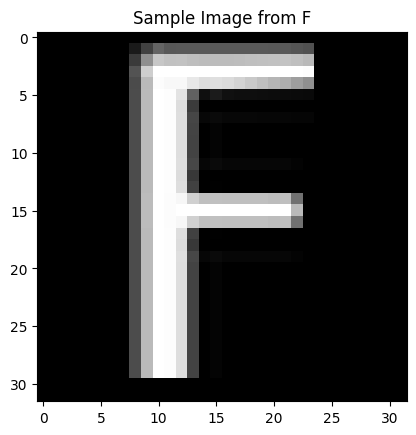

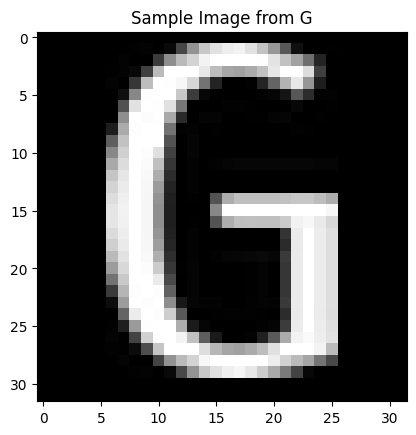

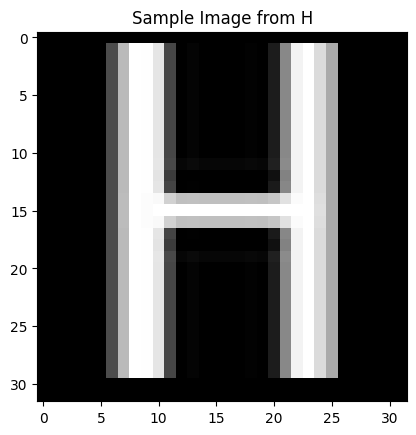

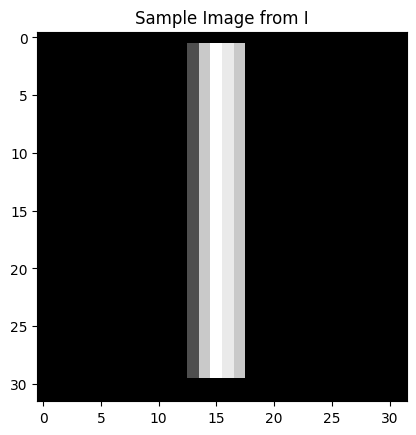

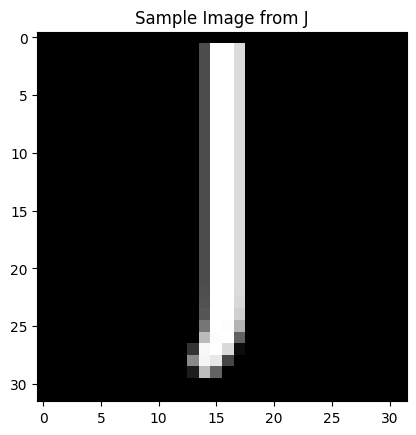

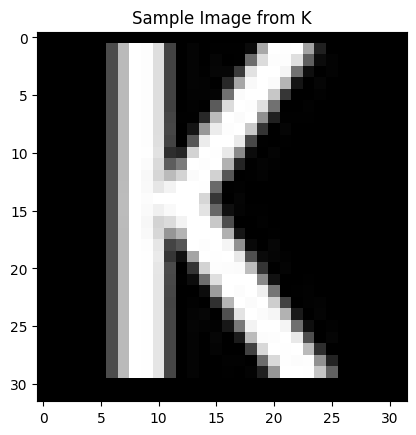

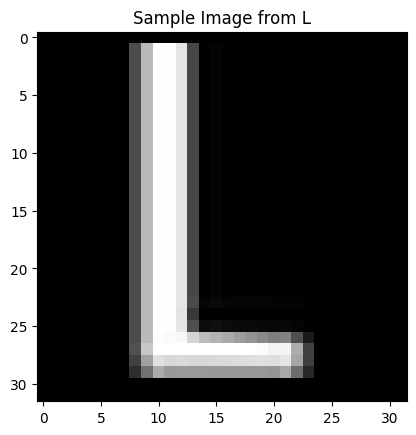

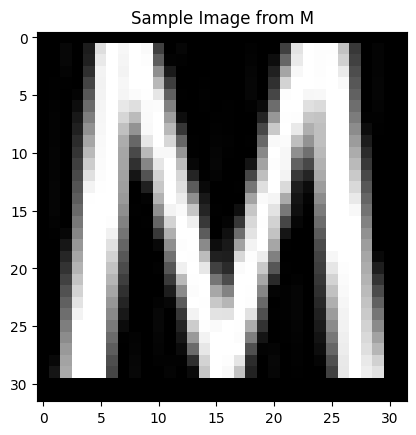

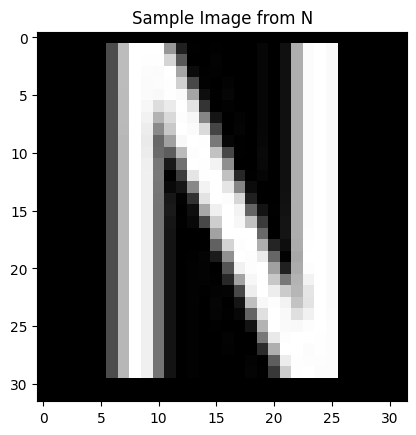

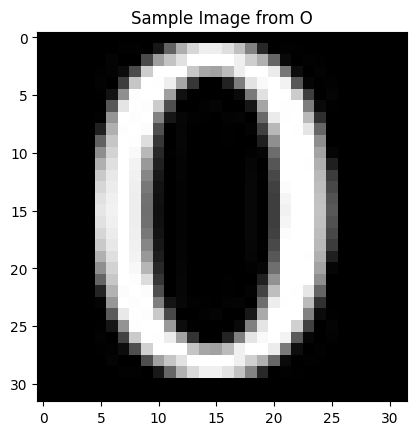

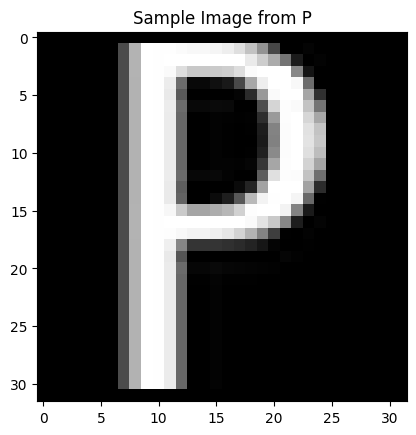

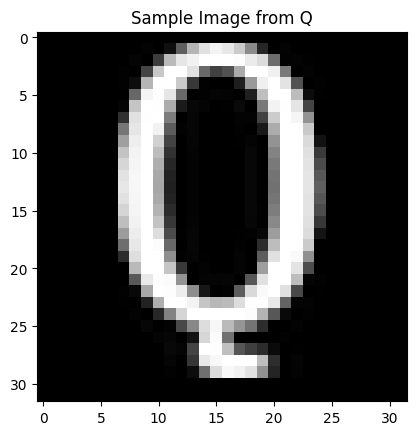

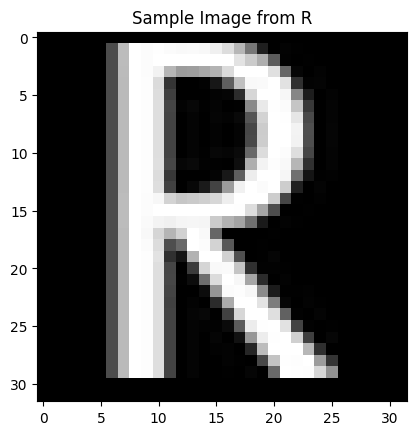

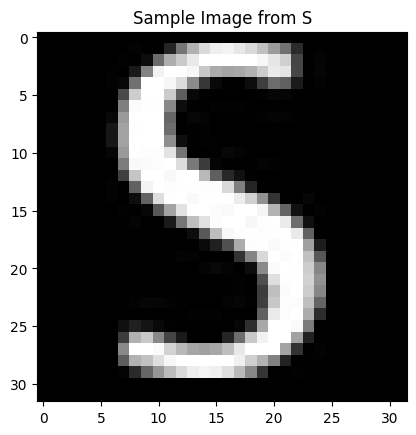

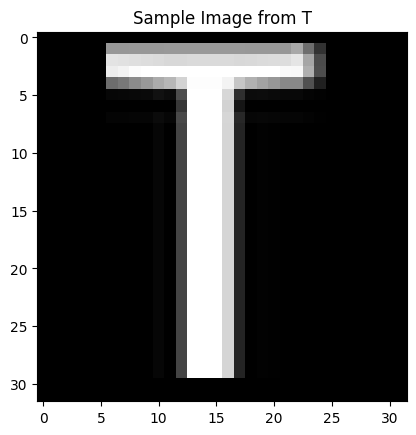

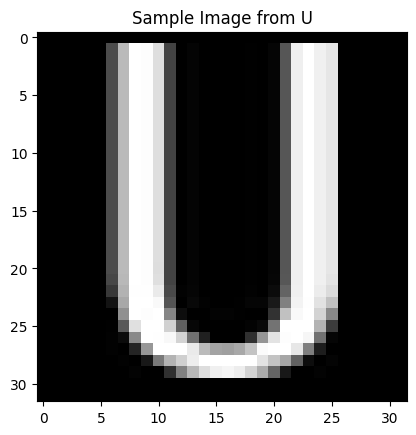

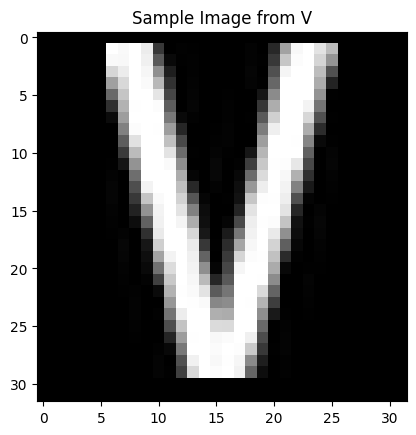

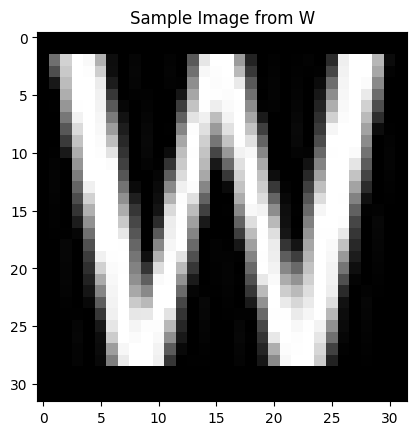

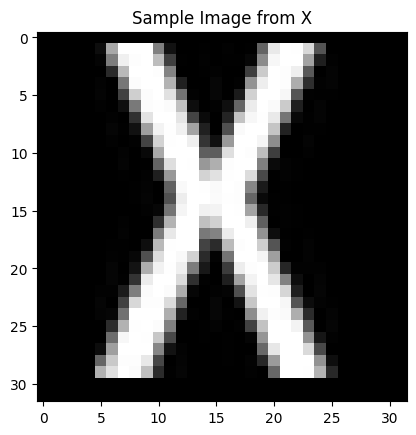

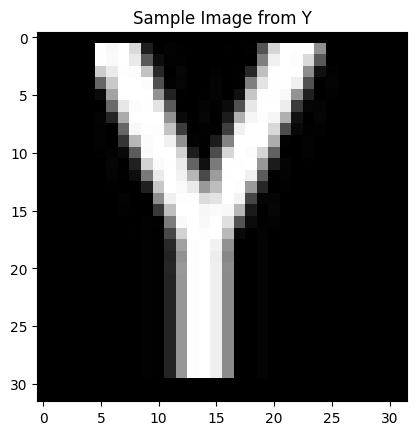

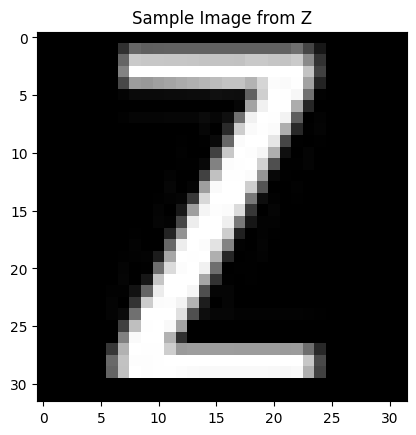

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/thomasqazwsxedc/alphabet-characters-fonts-dataset/versions/2/Images/Images"
print("Contents of nested Images folder:", os.listdir(dataset_path))
unlabelled_data = {}
for folder in sorted(os.listdir(dataset_path)):
  folder_path = os.path.join(dataset_path, folder)
  unlabelled_data[folder] = {}
# Get all image files and sort them (optional)
  image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
  image_files = sorted(image_files)  # Sorting ensures consistency
  # Process only the first 100 images
  for i, image_name in enumerate(image_files[:500]):
    image_path = os.path.join(folder_path, image_name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.array(img)
    unlabelled_data[folder][i] = img
    if i == 0:
      plt.imshow(img, cmap='gray')
      plt.title(f"Sample Image from {folder}")
      plt.show()

In [ ]:
print(unlabelled_data.keys())

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])


In [ ]:
print(len(unlabelled_data["A"]))

500


In [ ]:
# new_uld = {}
# for key in sorted(unlabelled_data.keys()):
#     new_uld[key] = unlabelled_data[key]
# unlabelled_data = new_uld


Processing Character 0...


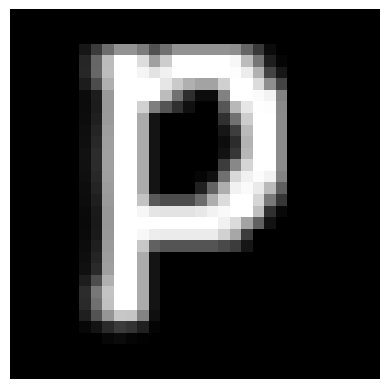

/usr/local/lib/python3.11/dist-packages/skimage/metrics/_structural_similarity.py:269: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D


Predicted character: P


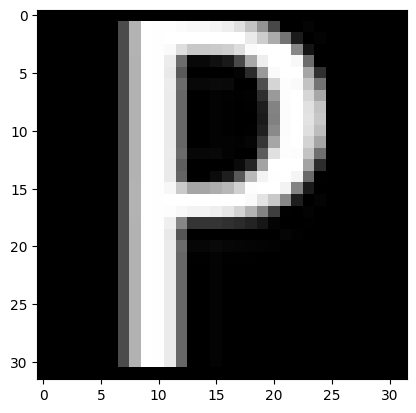


Processing Character 1...


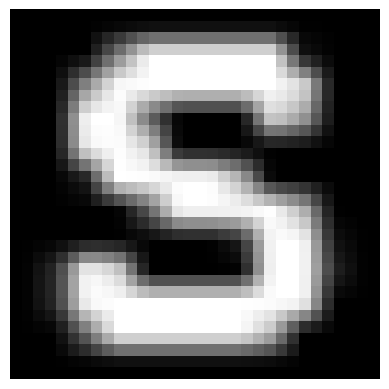

Predicted character: S


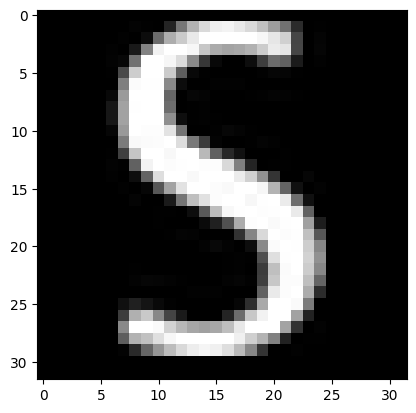


Processing Character 2...


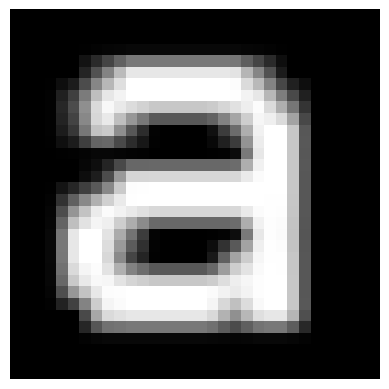

Predicted character: O


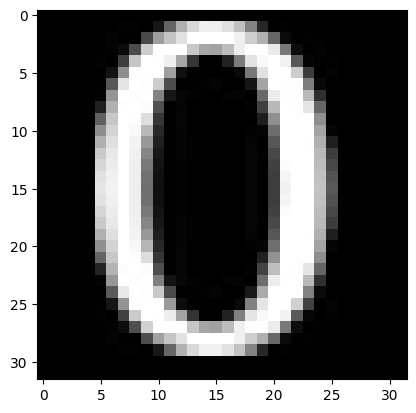


Processing Character 3...


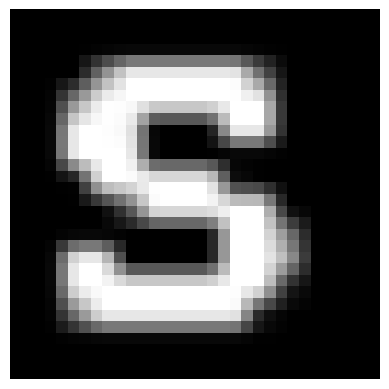

Predicted character: S


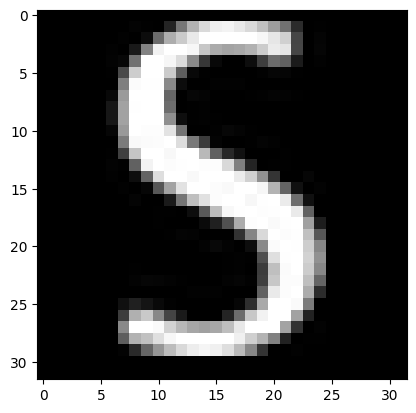


Processing Character 4...


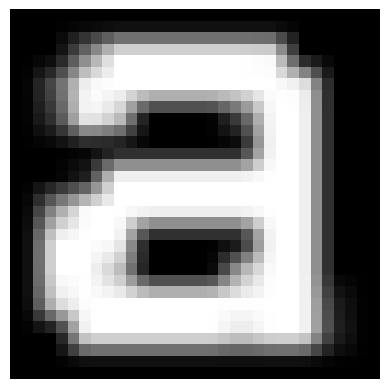

Predicted character: B


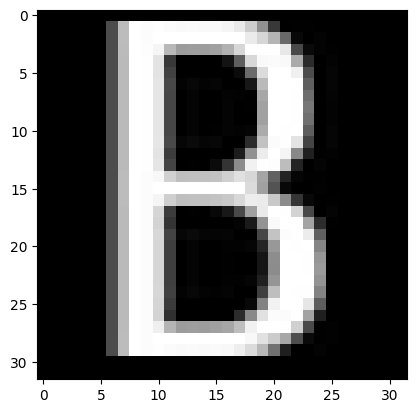


Processing Character 5...


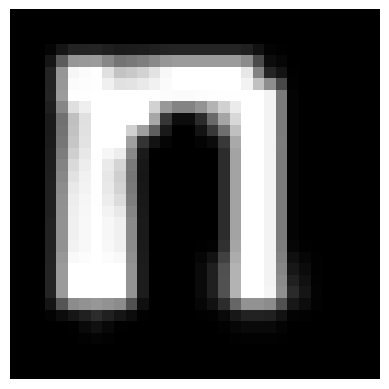

Predicted character: U


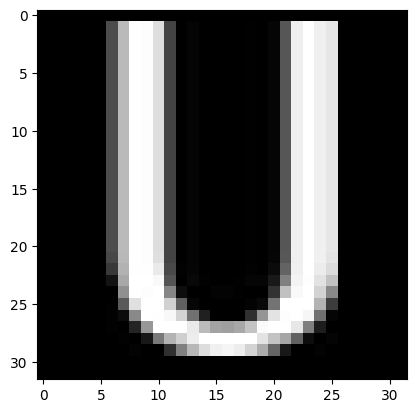


Processing Character 6...


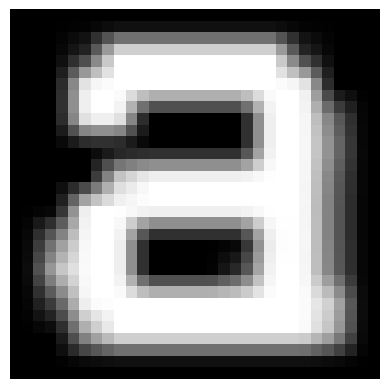

Predicted character: B


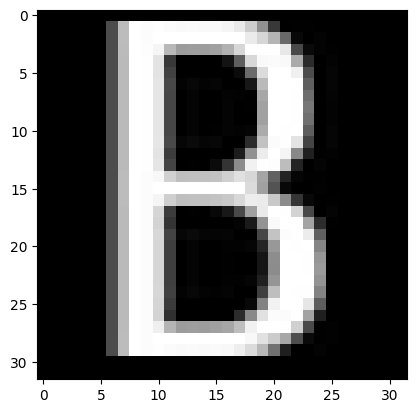


Processing Character 7...


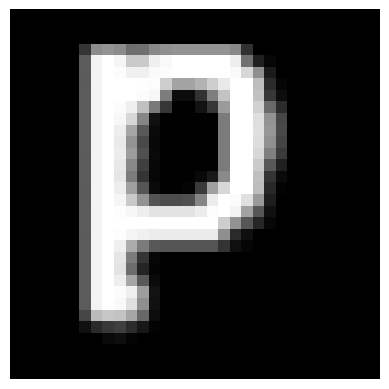

Predicted character: P


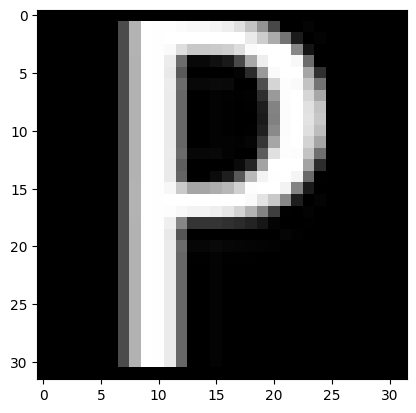

In [ ]:
from skimage.metrics import structural_similarity as ssim

for idx in range(8):
    img = segment[f"character_{idx}"]
    img = img.astype(np.float32) / 255.0
    print(f"\nProcessing Character {idx}...")

    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

    similarity_scores = []

    for k in range(len(unlabelled_data)):
        for l in range(len(unlabelled_data[chr(65 + k)])):
            template = unlabelled_data[chr(65 + k)][l]
            template = template.astype(np.float32) / 255.0

            if template.shape != img.shape:
                template = cv2.resize(template, (img.shape[1], img.shape[0]))  # Resize

            # Compute Structural Similarity Index (SSIM)
            score = ssim(img, template, data_range=template.max() - template.min())

            similarity_scores.append((score, chr(65 + k)))  # Store score with corresponding character

    # Find the best match (highest SSIM score)
    best_character = max(similarity_scores, key=lambda x: x[0])[1]

    print(f"Predicted character: {best_character}")
    plt.imshow(unlabelled_data[best_character][0], cmap="gray")
    plt.show()

In [ ]:
from skimage.metrics import structural_similarity as ssim
for idx in range(8):
    img = segment[f"character_{idx}"]
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

    sum_score = np.zeros(len(unlabelled_data))

    for k in range(len(unlabelled_data)):
        for l in range(len(unlabelled_data[chr(65+k)])):
            template = unlabelled_data[chr(65 + k)][l]
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    # error_sum += pow((img[i,j] - unlabelled_data[chr(65+k)][l][i,j]), 2)
                    # error_sum += abs(img[i,j] - unlabelled_data[chr(65+k)][l][i,j])
                    # img_is_nonzero = int(img[i,j] != 0)
                    # unlabelled_data_is_nonzero = int(unlabelled_data[chr(65+k)][l][i,j] != 0)
                    # error_sum += abs(img_is_nonzero - unlabelled_data_is_nonzero)
                    error_sum = ssim(img, template, data_range=template.max() - template.min())
            # Take the mean squared error
            sum_score[k] += error_sum / (img.shape[0] * img.shape[1])
        sum_score[k] /= len(unlabelled_data[chr(65 + k)])

    # Find the best match
    best_match_index = np.argmin(sum_score)  # Find minimum error
    best_character = chr(65 + best_match_index)

    print(best_character)
    plt.imshow(unlabelled_data[best_character][0], cmap="gray")


Processing Character 0...


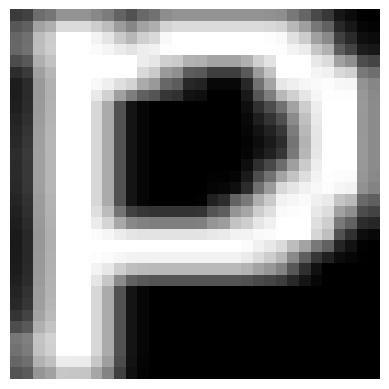

Predicted Character: P


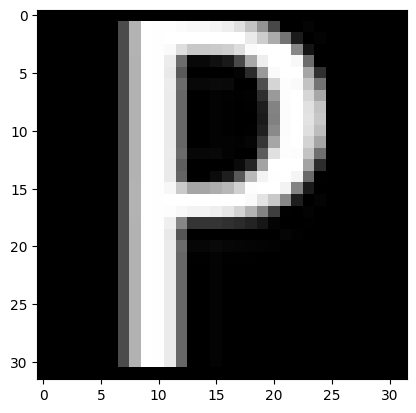


Processing Character 1...


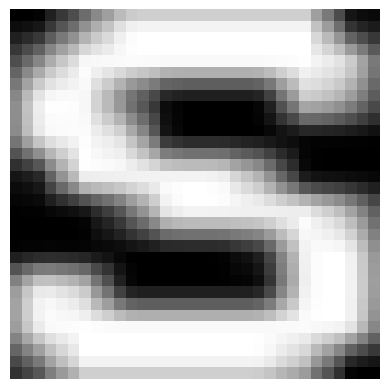

Predicted Character: S


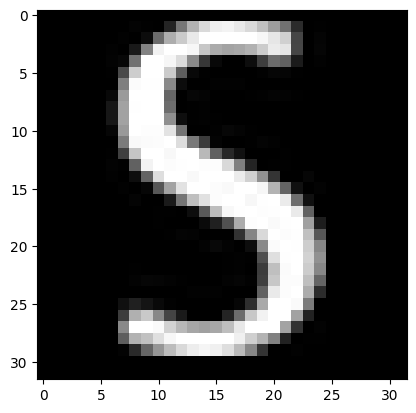


Processing Character 2...


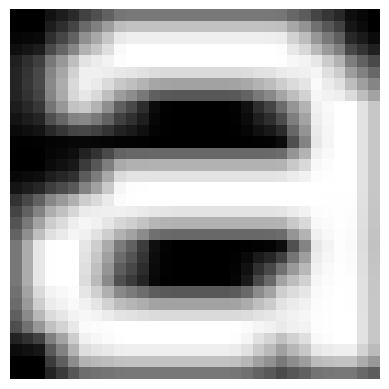

Predicted Character: Z


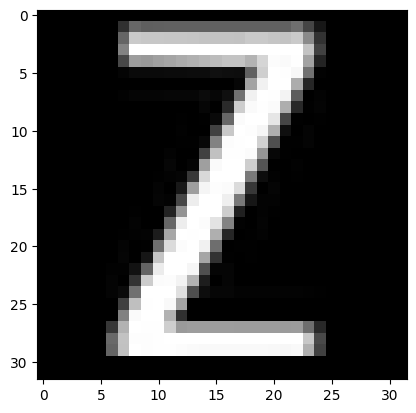


Processing Character 3...


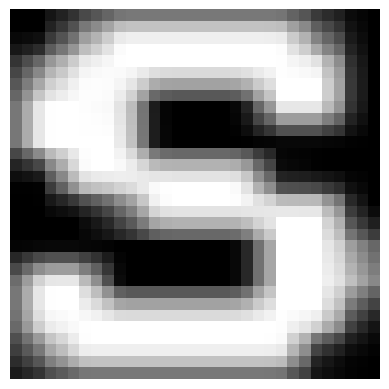

Predicted Character: S


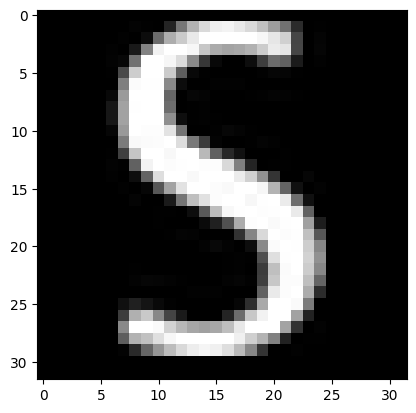


Processing Character 4...


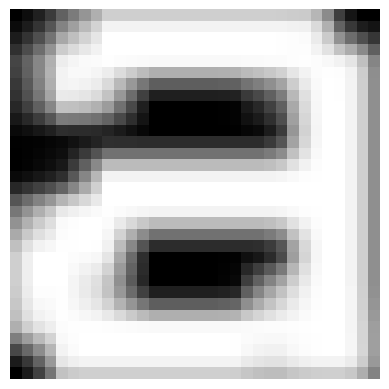

Predicted Character: B


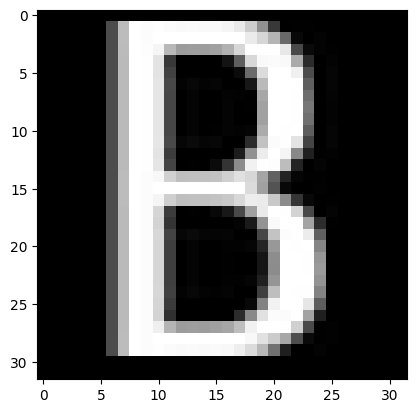


Processing Character 5...


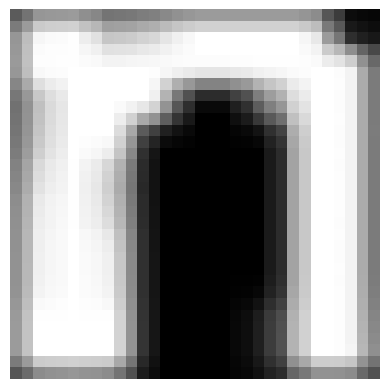

Predicted Character: N


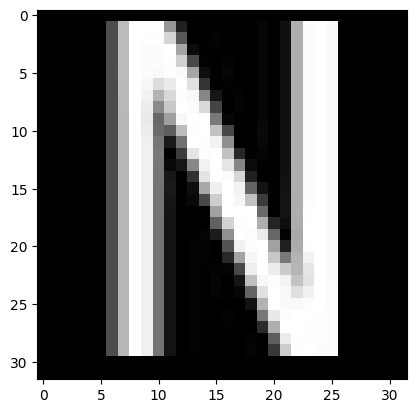


Processing Character 6...


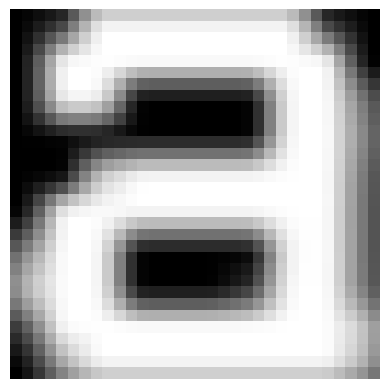

Predicted Character: B


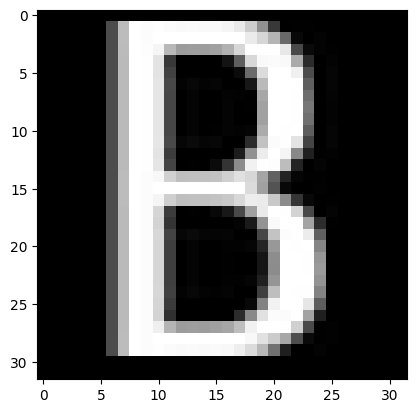


Processing Character 7...


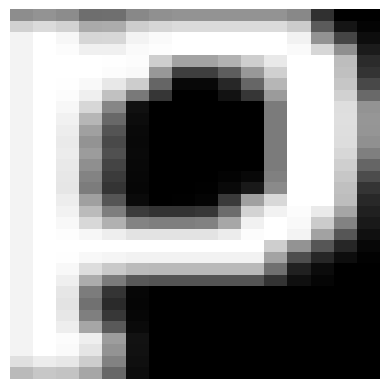

Predicted Character: P


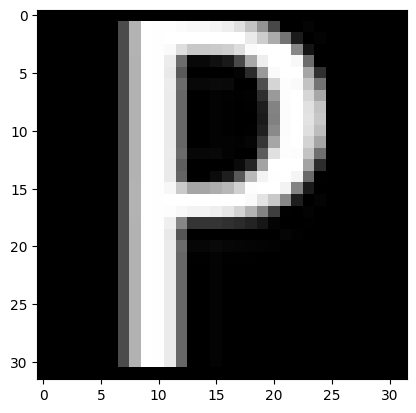

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def preprocess_image(img, target_size=(32, 32)):
    """ Centers and resizes the character image to match the template size. """

    # Convert to binary (assuming white character on black background)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find bounding box of the character
    coords = cv2.findNonZero(binary)  # Get all non-zero pixel coordinates
    x, y, w, h = cv2.boundingRect(coords)  # Get bounding box
    cropped = img[y:y+h, x:x+w]  # Crop to character

    # Resize to target size
    resized = cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)

    # Center the character in a fixed-size box (same as target)
    canvas = np.zeros(target_size, dtype=np.uint8)
    x_offset = (target_size[0] - resized.shape[0]) // 2
    y_offset = (target_size[1] - resized.shape[1]) // 2
    canvas[x_offset:x_offset+resized.shape[0], y_offset:y_offset+resized.shape[1]] = resized

    return canvas

for idx in range(8):
    print(f"\nProcessing Character {idx}...")

    # Get the character image
    img = segment[f"character_{idx}"]

    # Preprocess the image
    img = preprocess_image(img)

    # Show preprocessed image
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

    similarity_scores = []

    for k in range(len(unlabelled_data)):
        for l in range(len(unlabelled_data[chr(65 + k)])):
            template = unlabelled_data[chr(65 + k)][l]

            # Ensure template is same size as img
            template = cv2.resize(template, (img.shape[1], img.shape[0]))

            # Compute SSIM
            score = ssim(img.astype(np.float32) / 255.0, template.astype(np.float32) / 255.0, data_range=(template.max() - template.min())/255.0)
            similarity_scores.append((chr(65 + k), score))

    # Find best match (highest SSIM score)
    best_match = max(similarity_scores, key=lambda x: x[1])
    best_character = best_match[0]

    print(f"Predicted Character: {best_character}")
    plt.imshow(unlabelled_data[best_character][0], cmap="gray")
    plt.show()